In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('medium_posts.csv')
df.head()

,published,domain,url
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...


In [2]:
df['published_date'] = pd.to_datetime(df['published']).dt.date
df.head()

,published,domain,url,published_date
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...,2012-08-13
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...,2012-08-13
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...,2016-11-04
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...,2016-12-24
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...,2015-09-22


In [3]:
df_by_day = df['published_date'].value_counts().sort_index()
df_by_day

1970-01-01      2
1970-01-18      3
2003-09-14      1
2004-04-04      1
2004-04-16      1
             ... 
2017-06-23    421
2017-06-24    277
2017-06-25    253
2017-06-26    207
2017-06-27     36
Name: published_date, Length: 1738, dtype: int64

In [4]:
df_by_day = df_by_day.iloc[2:]
df_by_day.head()

2003-09-14    1
2004-04-04    1
2004-04-16    1
2005-09-12    1
2006-02-19    1
Name: published_date, dtype: int64

In [5]:
df_by_day = df_by_day.to_frame()
df_by_day['ds'] = df_by_day.index

In [6]:
df_by_day.rename(columns={"published_date":"y"}, inplace=True)

In [7]:
df_by_day.head()

,y,ds
2003-09-14,1,2003-09-14
2004-04-04,1,2004-04-04
2004-04-16,1,2004-04-16
2005-09-12,1,2005-09-12
2006-02-19,1,2006-02-19


In [8]:
import datetime

cut_date = datetime.date(2011, 1, 1)
df_by_day = df_by_day[df_by_day.ds > cut_date]
df_by_day

,y,ds
2011-01-14,1,2011-01-14
2011-02-01,1,2011-02-01
2011-03-22,1,2011-03-22
2011-03-23,1,2011-03-23
2011-03-25,1,2011-03-25
...,...,...
2017-06-23,421,2017-06-23
2017-06-24,277,2017-06-24
2017-06-25,253,2017-06-25
2017-06-26,207,2017-06-26


In [9]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
m = Prophet()
m.fit(df_by_day)
future = m.make_future_dataframe(periods=365)
future.tail()

11:00:49 - cmdstanpy - INFO - Chain [1] start processing
11:00:49 - cmdstanpy - INFO - Chain [1] done processing


,ds
2062,2018-06-23
2063,2018-06-24
2064,2018-06-25
2065,2018-06-26
2066,2018-06-27


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2062,2018-06-23,445.605631,413.699652,480.744722
2063,2018-06-24,447.074701,413.540754,481.470506
2064,2018-06-25,474.361918,438.963174,506.147269
2065,2018-06-26,475.762400,442.415937,508.940220
2066,2018-06-27,476.496348,444.993283,510.577612


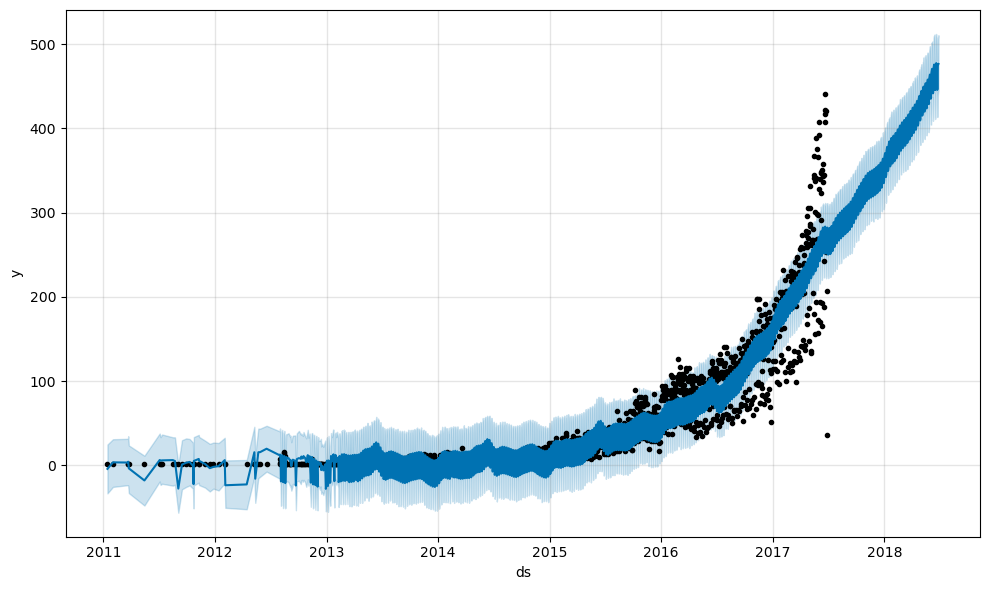

In [11]:
fig1 = m.plot(forecast)

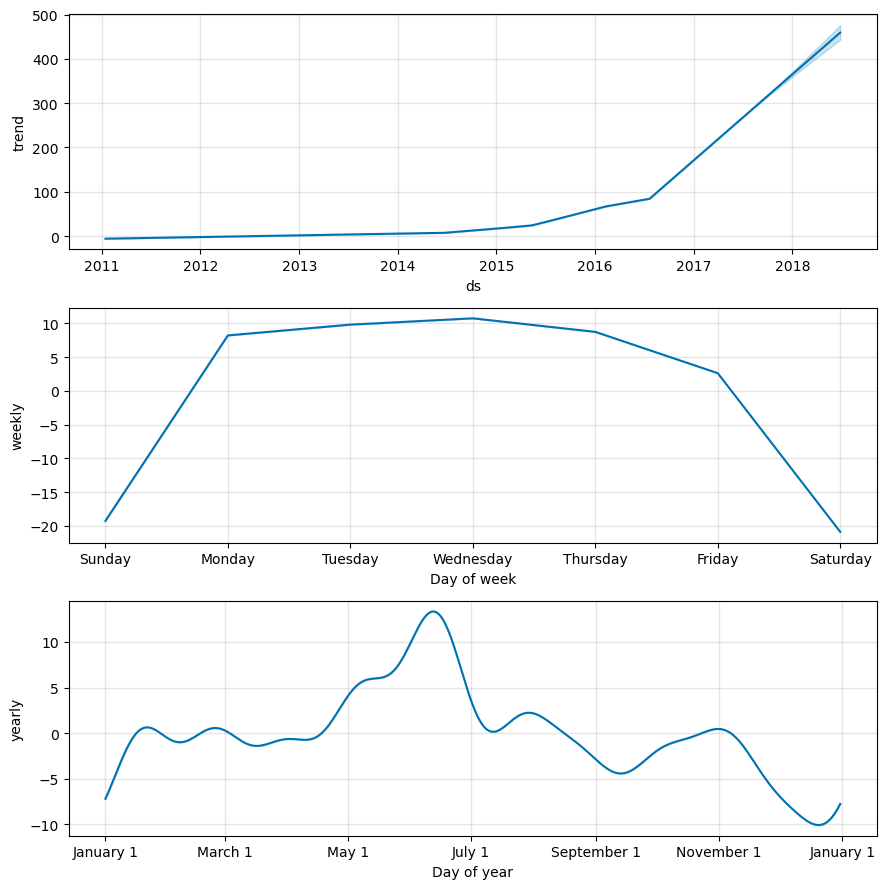

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/8 [00:00<?, ?it/s]

11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:50 - cmdstanpy - INFO - Chain [1] start processing
11:00:50 - cmdstanpy - INFO - Chain [1] done processing
11:00:51 - cmdstanpy - INFO - Chain [1] start processing
11:00:51 - cmdstanpy - INFO - Chain [1] done processing
11:00:51 - cmdstanpy - INFO - Chain [1] start processing
11:00:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-01-15,2.027711,-0.710781,4.488674,4,2013-01-14
1,2013-01-18,1.651926,-0.695876,4.234401,1,2013-01-14
2,2013-01-22,1.887859,-0.828111,4.503901,1,2013-01-14
3,2013-01-23,2.609510,-0.059131,5.385332,2,2013-01-14
4,2013-01-26,0.553718,-1.949797,3.138136,1,2013-01-14


In [14]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,140.811137,11.866387,7.562267,0.385968,0.275033,0.343767,0.492560
1,40 days,144.300315,12.012507,7.620417,0.380973,0.273208,0.340535,0.497520
2,41 days,149.098927,12.210607,7.679522,0.375710,0.273208,0.337655,0.504464
3,42 days,153.680097,12.396778,7.743119,0.383062,0.273477,0.339558,0.508681
4,43 days,147.435678,12.142309,7.581280,0.383080,0.273101,0.337540,0.510417


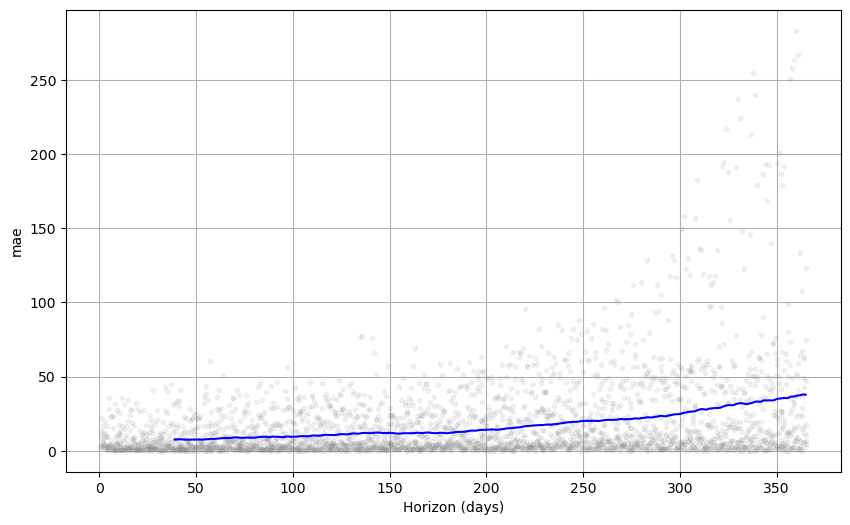

In [15]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [16]:
import itertools
import numpy as np
import pandas as pd

import logging
logging.getLogger('cmdstanpy').setLevel(logging.CRITICAL)

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale' : [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode' : ['additive', 'multiplicative'],
    'changepoint_range' : [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_by_day)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
print(tuning_results)

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Fall

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Fall

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.01   
3                      0.001                     0.01                  0.01   
4                      0.001                     0.01                  0.10   
..                       ...                      ...                   ...   
251                    0.500                    10.00                  1.00   
252                    0.500                    10.00                 10.00   
253                    0.500                    10.00                 10.00   
254                    0.500                    10.00                 10.00   
255                    0.500                    10.00                 10.00   

    seasonality_mode  changepoint_range       rmse 

In [17]:
tuning_results.sort_values('mae').head(40)

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,changepoint_range,rmse,mae
131,0.1,0.01,0.01,multiplicative,0.95,29.960287,15.213973
135,0.1,0.01,0.10,multiplicative,0.95,29.960287,15.213973
139,0.1,0.01,1.00,multiplicative,0.95,29.960287,15.213973
143,0.1,0.01,10.00,multiplicative,0.95,29.960287,15.213973
202,0.5,0.01,1.00,multiplicative,0.80,29.832483,15.347385
194,0.5,0.01,0.01,multiplicative,0.80,29.832483,15.347385
198,0.5,0.01,0.10,multiplicative,0.80,29.832483,15.347385
206,0.5,0.01,10.00,multiplicative,0.80,29.832483,15.347385
130,0.1,0.01,0.01,multiplicative,0.80,30.065697,15.378443
134,0.1,0.01,0.10,multiplicative,0.80,30.065697,15.378443


## Second version of tuning - Optuna

In [19]:
import optuna

trials_number = 256

def objective(trial) -> float:
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 1.0)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 100.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 100.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_range = trial.suggest_uniform('changepoint_range', 0.65, 0.95)

    m = Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale,
               holidays_prior_scale=holidays_prior_scale, seasonality_mode=seasonality_mode,
               changepoint_range=changepoint_range).fit(df_by_day)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

    score = df_p['mae'].values[0]
    print("  MAE: {}".format(df_p['mae'].values[0]))
    print("  RMSE: {}".format(df_p['rmse'].values[0]))

    print("  Params for trial " + str(trial.number) + ": ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    return score

study_name = 'medium-study-cut-first-years'
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, direction="minimize", storage=storage_name, load_if_exists=True,)

study.enqueue_trial({
        "changepoint_prior_scale": 0.05,
        "seasonality_prior_scale": 10.0,
        "holidays_prior_scale": 10.0,
        "seasonality_mode": "additive",
        "changepoint_range": 0.8
    })

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=trials_number)

[I 2023-03-11 11:06:31,002] A new study created in RDB with name: medium-study-cut-first-years
/tmp/ipykernel_112192/782673174.py:33: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial({
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(


  MAE: 18.035203854614043
  RMSE: 33.85251377947967
  Params for trial 0: 
    changepoint_prior_scale: 0.05
    seasonality_prior_scale: 10.0
    holidays_prior_scale: 10.0
    seasonality_mode: additive
    changepoint_range: 0.8
  MAE: 18.266368650158075
  RMSE: 34.21953246819015
  Params for trial 1: 
    changepoint_prior_scale: 0.061729882312225745
    seasonality_prior_scale: 2.5435203348190223
    holidays_prior_scale: 19.776440597772023
    seasonality_mode: additive
    changepoint_range: 0.726095624523007
  MAE: 17.393816478310406
  RMSE: 34.035219797489866
  Params for trial 2: 
    changepoint_prior_scale: 0.8957837225752511
    seasonality_prior_scale: 1.4680612807741462
    holidays_prior_scale: 95.46038982419292
    seasonality_mode: additive
    changepoint_range: 0.8511407072470476
  MAE: 18.271609271148293
  RMSE: 34.549107388523154
  Params for trial 3: 
    changepoint_prior_scale: 0.696547828809499
    seasonality_prior_scale: 1.1566107061763473
    holidays_prior

Optimization terminated abnormally. Falling back to Newton.


  MAE: 19.21362944523285
  RMSE: 35.318569857737934
  Params for trial 16: 
    changepoint_prior_scale: 0.02045777774733604
    seasonality_prior_scale: 24.442101312200847
    holidays_prior_scale: 5.447484375165206
    seasonality_mode: additive
    changepoint_range: 0.8198505251661492
  MAE: 17.77571123818291
  RMSE: 33.784480117563184
  Params for trial 17: 
    changepoint_prior_scale: 0.39611375899227685
    seasonality_prior_scale: 9.374536530015424
    holidays_prior_scale: 0.010066480406002344
    seasonality_mode: additive
    changepoint_range: 0.7114286786022794
  MAE: 16.52946772713846
  RMSE: 30.934239571778416
  Params for trial 18: 
    changepoint_prior_scale: 0.15050765603715144
    seasonality_prior_scale: 41.538050790980456
    holidays_prior_scale: 0.39905927749173586
    seasonality_mode: multiplicative
    changepoint_range: 0.8983079345594414
  MAE: 16.66068579035054
  RMSE: 31.13573117985031
  Params for trial 19: 
    changepoint_prior_scale: 0.11411202668033

  MAE: 16.145760193928815
  RMSE: 30.476763918313782
  Params for trial 44: 
    changepoint_prior_scale: 0.7685912405147197
    seasonality_prior_scale: 0.39429179934323194
    holidays_prior_scale: 0.03149854461332206
    seasonality_mode: multiplicative
    changepoint_range: 0.8517502339271718


Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  MAE: 30.37806637713431
  RMSE: 51.917740990017236
  Params for trial 45: 
    changepoint_prior_scale: 0.0010078172941732138
    seasonality_prior_scale: 0.03629694378550751
    holidays_prior_scale: 0.017620815617874565
    seasonality_mode: multiplicative
    changepoint_range: 0.8593278559249108
  MAE: 14.540169193537222
  RMSE: 29.07224110579515
  Params for trial 46: 
    changepoint_prior_scale: 0.1929045615906252
    seasonality_prior_scale: 0.017848583339465787
    holidays_prior_scale: 0.01024410669947386
    seasonality_mode: multiplicative
    changepoint_range: 0.9308876190456654
  MAE: 14.52192569467115
  RMSE: 29.055611697000025
  Params for trial 47: 
    changepoint_prior_scale: 0.1898212247899304
    seasonality_prior_scale: 0.018530799897214775
    holidays_prior_scale: 0.010188361116497844
    seasonality_mode: multiplicative
    changepoint_range: 0.937318900317744
  MAE: 15.224842759279642
  RMSE: 29.83094149698572
  Params for trial 48: 
    changepoint_prior_sc

  MAE: 15.632103193146635
  RMSE: 30.060254231843526
  Params for trial 73: 
    changepoint_prior_scale: 0.8260923163941505
    seasonality_prior_scale: 0.09590601666634799
    holidays_prior_scale: 0.09411683661787168
    seasonality_mode: multiplicative
    changepoint_range: 0.8309056278695531
  MAE: 14.457861469958345
  RMSE: 28.894049799543325
  Params for trial 74: 
    changepoint_prior_scale: 0.4421951598283729
    seasonality_prior_scale: 0.024167401595515465
    holidays_prior_scale: 0.20938122174121324
    seasonality_mode: multiplicative
    changepoint_range: 0.8665837064039507
  MAE: 15.04824761459835
  RMSE: 29.639991194388767
  Params for trial 75: 
    changepoint_prior_scale: 0.227391889088043
    seasonality_prior_scale: 0.0361559230789595
    holidays_prior_scale: 0.1985986361581127
    seasonality_mode: multiplicative
    changepoint_range: 0.9008071326636873
  MAE: 15.40878200834725
  RMSE: 29.922523965930967
  Params for trial 76: 
    changepoint_prior_scale: 0

  MAE: 14.429987596726045
  RMSE: 28.848886824488247
  Params for trial 101: 
    changepoint_prior_scale: 0.43430530992183486
    seasonality_prior_scale: 0.022275019529202845
    holidays_prior_scale: 0.013341754216160205
    seasonality_mode: multiplicative
    changepoint_range: 0.8653242830711059
  MAE: 14.511709155528985
  RMSE: 29.046713698274004
  Params for trial 102: 
    changepoint_prior_scale: 0.2675495676000386
    seasonality_prior_scale: 0.02140982294411465
    holidays_prior_scale: 0.012573995386429834
    seasonality_mode: multiplicative
    changepoint_range: 0.8638786625288771
  MAE: 14.739842204503667
  RMSE: 29.252031658436422
  Params for trial 103: 
    changepoint_prior_scale: 0.5542637182872899
    seasonality_prior_scale: 0.034899873149456376
    holidays_prior_scale: 0.015176269250054015
    seasonality_mode: multiplicative
    changepoint_range: 0.854052043280985
  MAE: 17.727884485157333
  RMSE: 32.200104855455486
  Params for trial 104: 
    changepoint_p

  MAE: 14.539803281022836
  RMSE: 29.081726389870685
  Params for trial 129: 
    changepoint_prior_scale: 0.19482015924379653
    seasonality_prior_scale: 0.02101528435574822
    holidays_prior_scale: 0.02270955273950465
    seasonality_mode: multiplicative
    changepoint_range: 0.8364259340033576
  MAE: 14.559200423811097
  RMSE: 29.04663399559873
  Params for trial 130: 
    changepoint_prior_scale: 0.3556065684773024
    seasonality_prior_scale: 0.015480001537056634
    holidays_prior_scale: 0.027259522100111705
    seasonality_mode: multiplicative
    changepoint_range: 0.8713806981927197
  MAE: 14.484302412879108
  RMSE: 28.98257022310069
  Params for trial 131: 
    changepoint_prior_scale: 0.4289235481822004
    seasonality_prior_scale: 0.026110111018443176
    holidays_prior_scale: 0.01453690522020125
    seasonality_mode: multiplicative
    changepoint_range: 0.8528502483210494
  MAE: 14.506900188238461
  RMSE: 29.017113071284488
  Params for trial 132: 
    changepoint_prio

  MAE: 14.738554586870983
  RMSE: 29.255381323897797
  Params for trial 157: 
    changepoint_prior_scale: 0.40223259880890616
    seasonality_prior_scale: 0.03299745282170931
    holidays_prior_scale: 5.095432730495872
    seasonality_mode: multiplicative
    changepoint_range: 0.8284815729536446
  MAE: 15.01559556048466
  RMSE: 29.47063579286404
  Params for trial 158: 
    changepoint_prior_scale: 0.676675650784084
    seasonality_prior_scale: 0.04685253582679266
    holidays_prior_scale: 2.5456105220928027
    seasonality_mode: multiplicative
    changepoint_range: 0.8356353404447361
  MAE: 14.602998213370642
  RMSE: 29.1524827826531
  Params for trial 159: 
    changepoint_prior_scale: 0.31334674440791543
    seasonality_prior_scale: 0.027542794523819015
    holidays_prior_scale: 3.5601834674809822
    seasonality_mode: multiplicative
    changepoint_range: 0.8463399288134855
  MAE: 16.335753002455974
  RMSE: 30.63022700301284
  Params for trial 160: 
    changepoint_prior_scale: 

  MAE: 15.145632552335641
  RMSE: 29.734474031475372
  Params for trial 185: 
    changepoint_prior_scale: 0.3398015794549132
    seasonality_prior_scale: 0.010207099348411082
    holidays_prior_scale: 3.030892988490576
    seasonality_mode: multiplicative
    changepoint_range: 0.8340592939306894
  MAE: 14.405153159172428
  RMSE: 28.827701663167474
  Params for trial 186: 
    changepoint_prior_scale: 0.3724648797123138
    seasonality_prior_scale: 0.01955077647456991
    holidays_prior_scale: 3.8763370949802685
    seasonality_mode: multiplicative
    changepoint_range: 0.8421843018882931
  MAE: 14.676412852391394
  RMSE: 29.3622214886188
  Params for trial 187: 
    changepoint_prior_scale: 0.4755085731761239
    seasonality_prior_scale: 0.014147711871922682
    holidays_prior_scale: 3.671096007012678
    seasonality_mode: multiplicative
    changepoint_range: 0.845133386559951
  MAE: 14.432187082439604
  RMSE: 28.870159293126264
  Params for trial 188: 
    changepoint_prior_scale:

  MAE: 14.375833917634726
  RMSE: 28.774952584307037
  Params for trial 213: 
    changepoint_prior_scale: 0.3346254584434147
    seasonality_prior_scale: 0.020082575356305286
    holidays_prior_scale: 1.3491756392436536
    seasonality_mode: multiplicative
    changepoint_range: 0.8481950847008191
  MAE: 14.40642775673941
  RMSE: 28.83201829151657
  Params for trial 214: 
    changepoint_prior_scale: 0.33349769082994535
    seasonality_prior_scale: 0.019774366876835467
    holidays_prior_scale: 1.204681828081675
    seasonality_mode: multiplicative
    changepoint_range: 0.8414846292713685
  MAE: 14.437856525274537
  RMSE: 28.861546445045345
  Params for trial 215: 
    changepoint_prior_scale: 0.34727455984105116
    seasonality_prior_scale: 0.0210489470363433
    holidays_prior_scale: 1.2666021316491816
    seasonality_mode: multiplicative
    changepoint_range: 0.8393873758254058
  MAE: 14.568718532179936
  RMSE: 29.169230648441495
  Params for trial 216: 
    changepoint_prior_sca

Optimization terminated abnormally. Falling back to Newton.


  MAE: 30.03879166933502
  RMSE: 51.54546155834805
  Params for trial 228: 
    changepoint_prior_scale: 0.0016416522851061457
    seasonality_prior_scale: 0.024730744064317398
    holidays_prior_scale: 1.6822530744132493
    seasonality_mode: multiplicative
    changepoint_range: 0.8585927322293389
  MAE: 16.41244258634812
  RMSE: 30.682831673420953
  Params for trial 229: 
    changepoint_prior_scale: 0.4110890765037978
    seasonality_prior_scale: 2.8395106415295914
    holidays_prior_scale: 2.326443938025076
    seasonality_mode: multiplicative
    changepoint_range: 0.8528425355429765
  MAE: 14.457912671693235
  RMSE: 28.90436781537436
  Params for trial 230: 
    changepoint_prior_scale: 0.3923790106163108
    seasonality_prior_scale: 0.016646493085324444
    holidays_prior_scale: 3.199201776846684
    seasonality_mode: multiplicative
    changepoint_range: 0.8465381233131157
  MAE: 14.439357948129999
  RMSE: 28.902725325180494
  Params for trial 231: 
    changepoint_prior_scale

In [20]:
print("\nBest trial:")
trial = study.best_trial

print("  MAE: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Best trial:
  MAE: 14.352905304190799
  Params: 
    changepoint_prior_scale: 0.35013012632782553
    changepoint_range: 0.8528502226873218
    holidays_prior_scale: 2.9070969476010564
    seasonality_mode: multiplicative
    seasonality_prior_scale: 0.021488326728016878


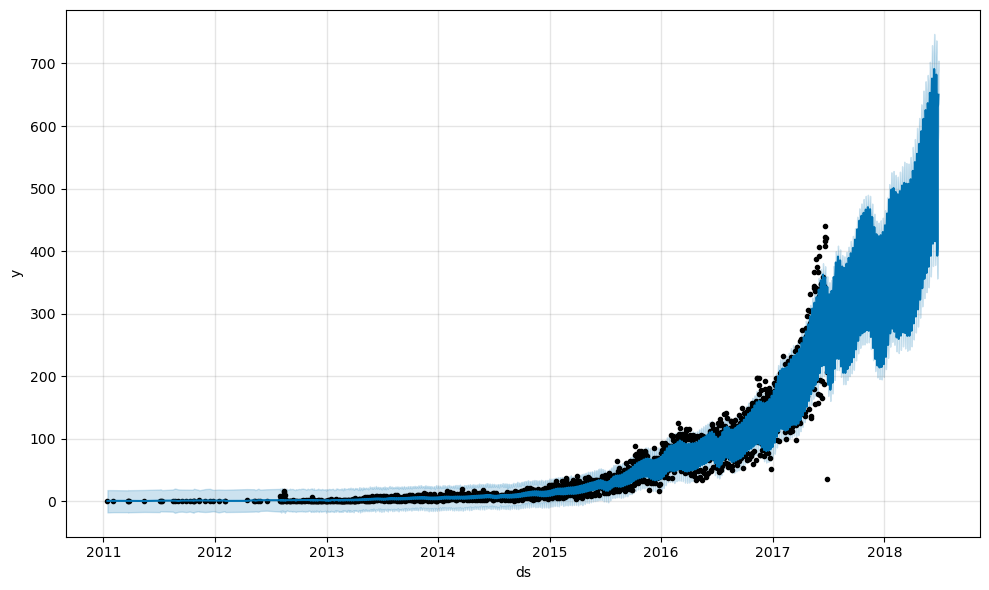

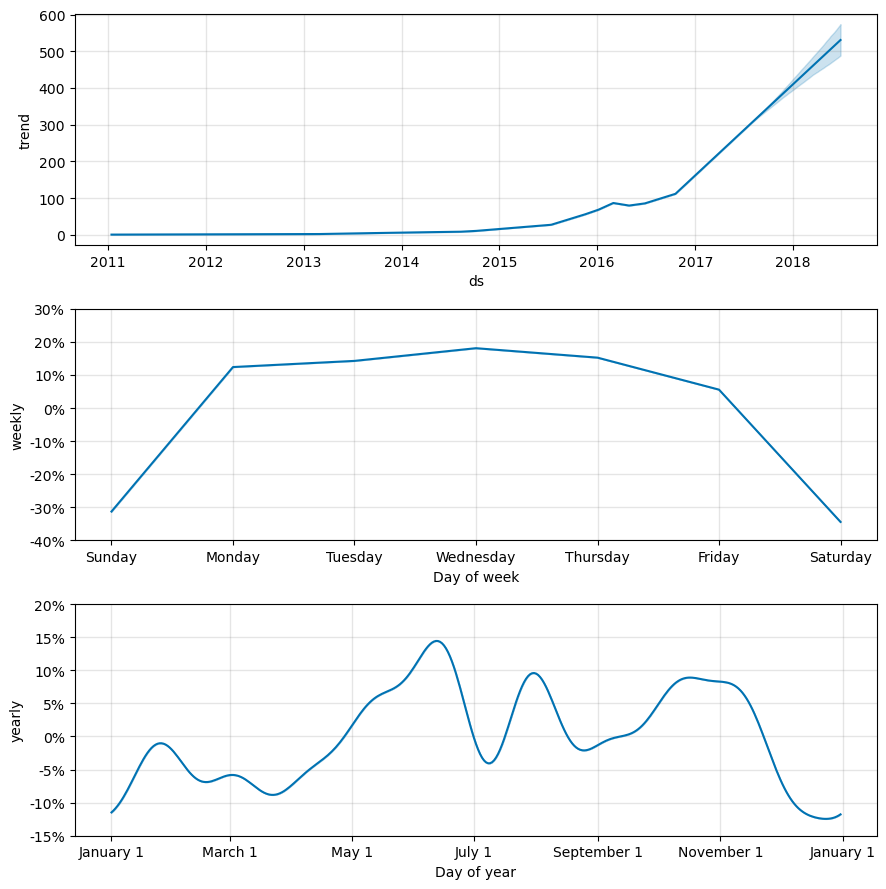

In [21]:
m = Prophet(changepoint_prior_scale=0.35013012632782553, seasonality_prior_scale=0.021488326728016878,
               holidays_prior_scale=2.9070969476010564, seasonality_mode="multiplicative",
               changepoint_range=0.8528502226873218)
m.fit(df_by_day)  # Fit model with given params

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)